In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.cluster import KMeans

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
df = pd.read_csv('C:/Users/aryan/Actual-Coding/ds-spec/1mg-substitute.csv')
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16867 entries, 0 to 16867
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16867 non-null  object 
 1   name                  16867 non-null  object 
 2   desc                  16862 non-null  object 
 3   activeIngredient      16867 non-null  object 
 4   alcoholWarning        15797 non-null  object 
 5   breastfeedingWarning  15797 non-null  object 
 6   pregnancyWarning      15797 non-null  object 
 7   manufacturer          16867 non-null  object 
 8   url                   16863 non-null  object 
 9   PricePerTablet        27 non-null     float64
dtypes: float64(1), object(9)
memory usage: 1.4+ MB


In [3]:
manufacturer_count  = df['manufacturer'].value_counts()
manufacturer_count = manufacturer_count[:10,]
manufacturer_count

Sun Pharmaceutical Industries Ltd    311
Zydus Cadila                         265
Alkem Laboratories Ltd               260
Torrent Pharmaceuticals Ltd          259
Intas Pharmaceuticals Ltd            251
Cipla Ltd                            234
Lupin Ltd                            210
Micro Labs Ltd                       177
Cadila Pharmaceuticals Ltd           172
Macleods Pharmaceuticals Pvt Ltd     146
Name: manufacturer, dtype: int64

In [4]:
activeIngredient_count  = df['activeIngredient'].value_counts()
activeIngredient_count =activeIngredient_count[:10,]
activeIngredient_count

Amoxycillin + Clavulanic Acid    304
Azithromycin                     302
Cefpodoxime Proxetil             265
Cefixime                         241
Ofloxacin                        212
Pantoprazole                     205
Domperidone+Pantoprazole         194
Domperidone+Rabeprazole          170
Cefuroxime                       164
Ofloxacin+Ornidazole             159
Name: activeIngredient, dtype: int64

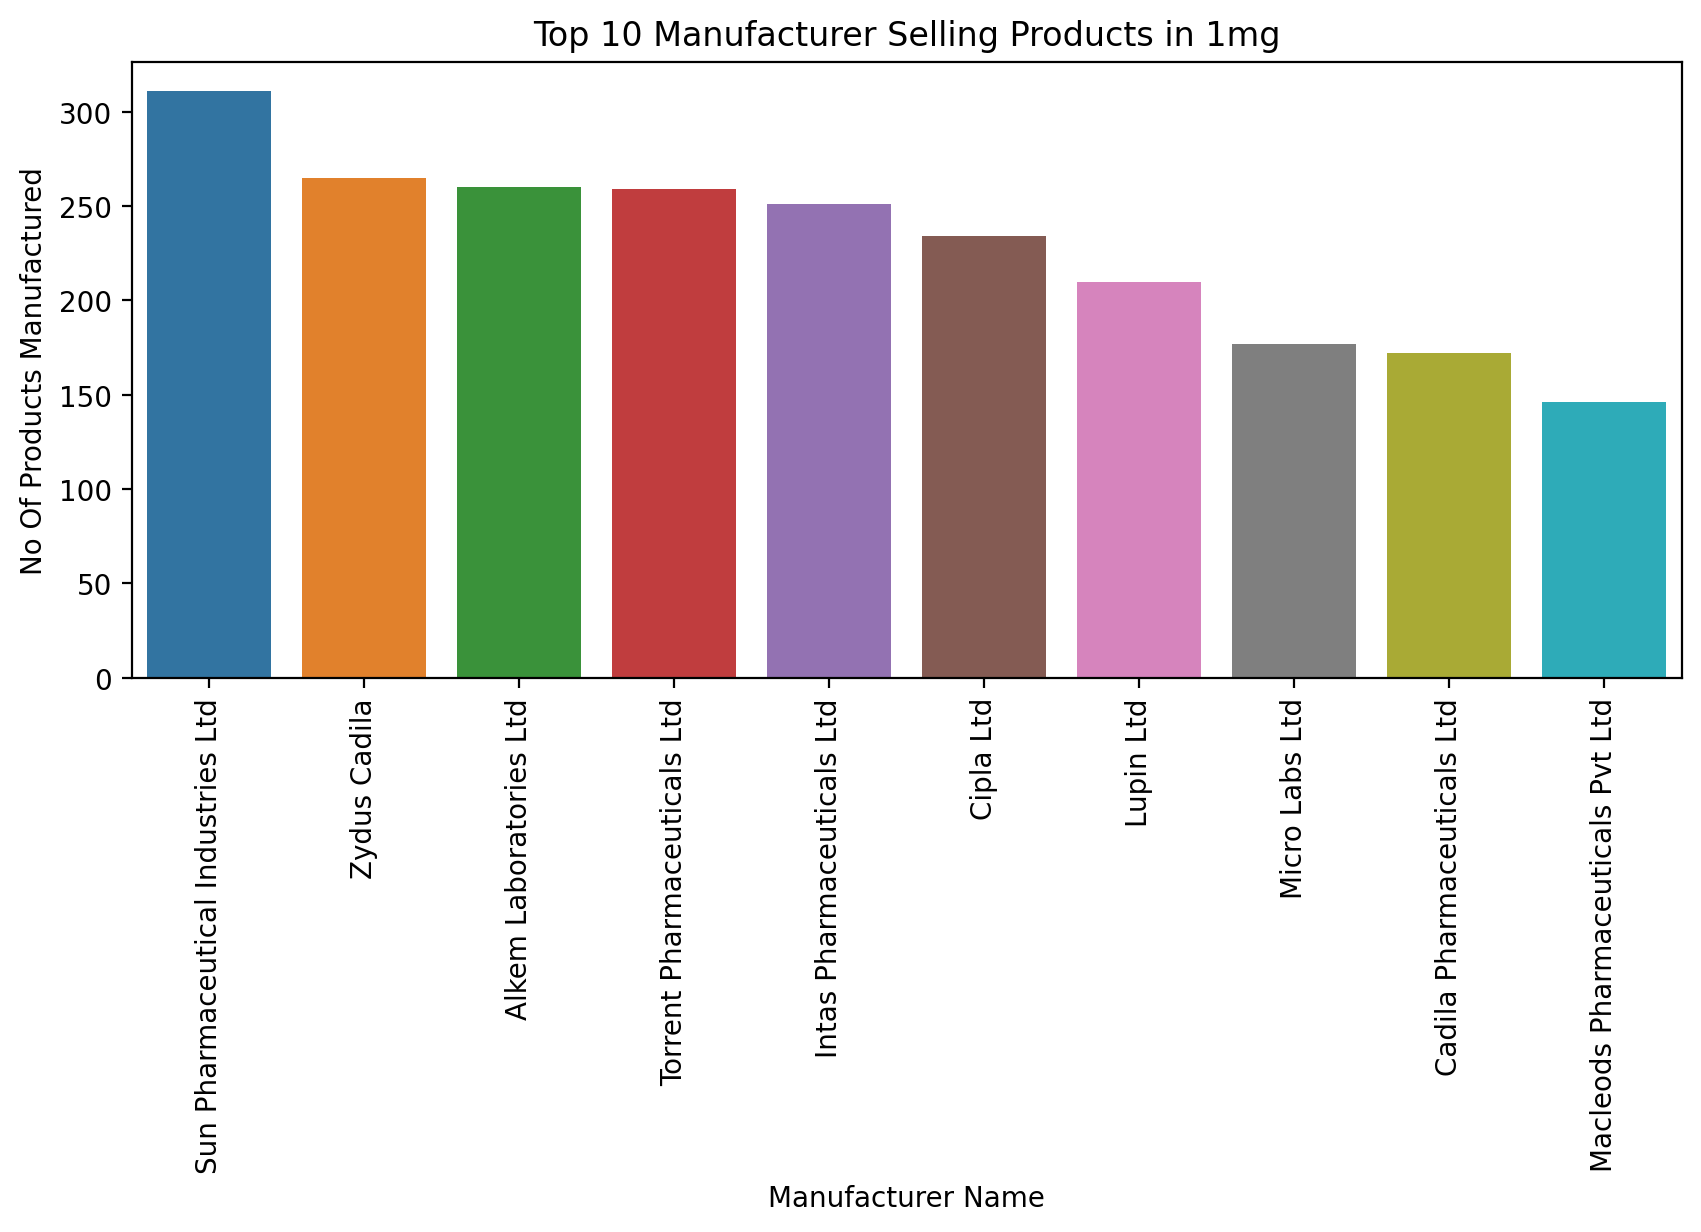

In [5]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=manufacturer_count.index,y=manufacturer_count.values)
plt.xticks(rotation=90)
plt.xlabel('Manufacturer Name')
plt.ylabel('No Of Products Manufactured')
plt.title('Top 10 Manufacturer Selling Products in 1mg');

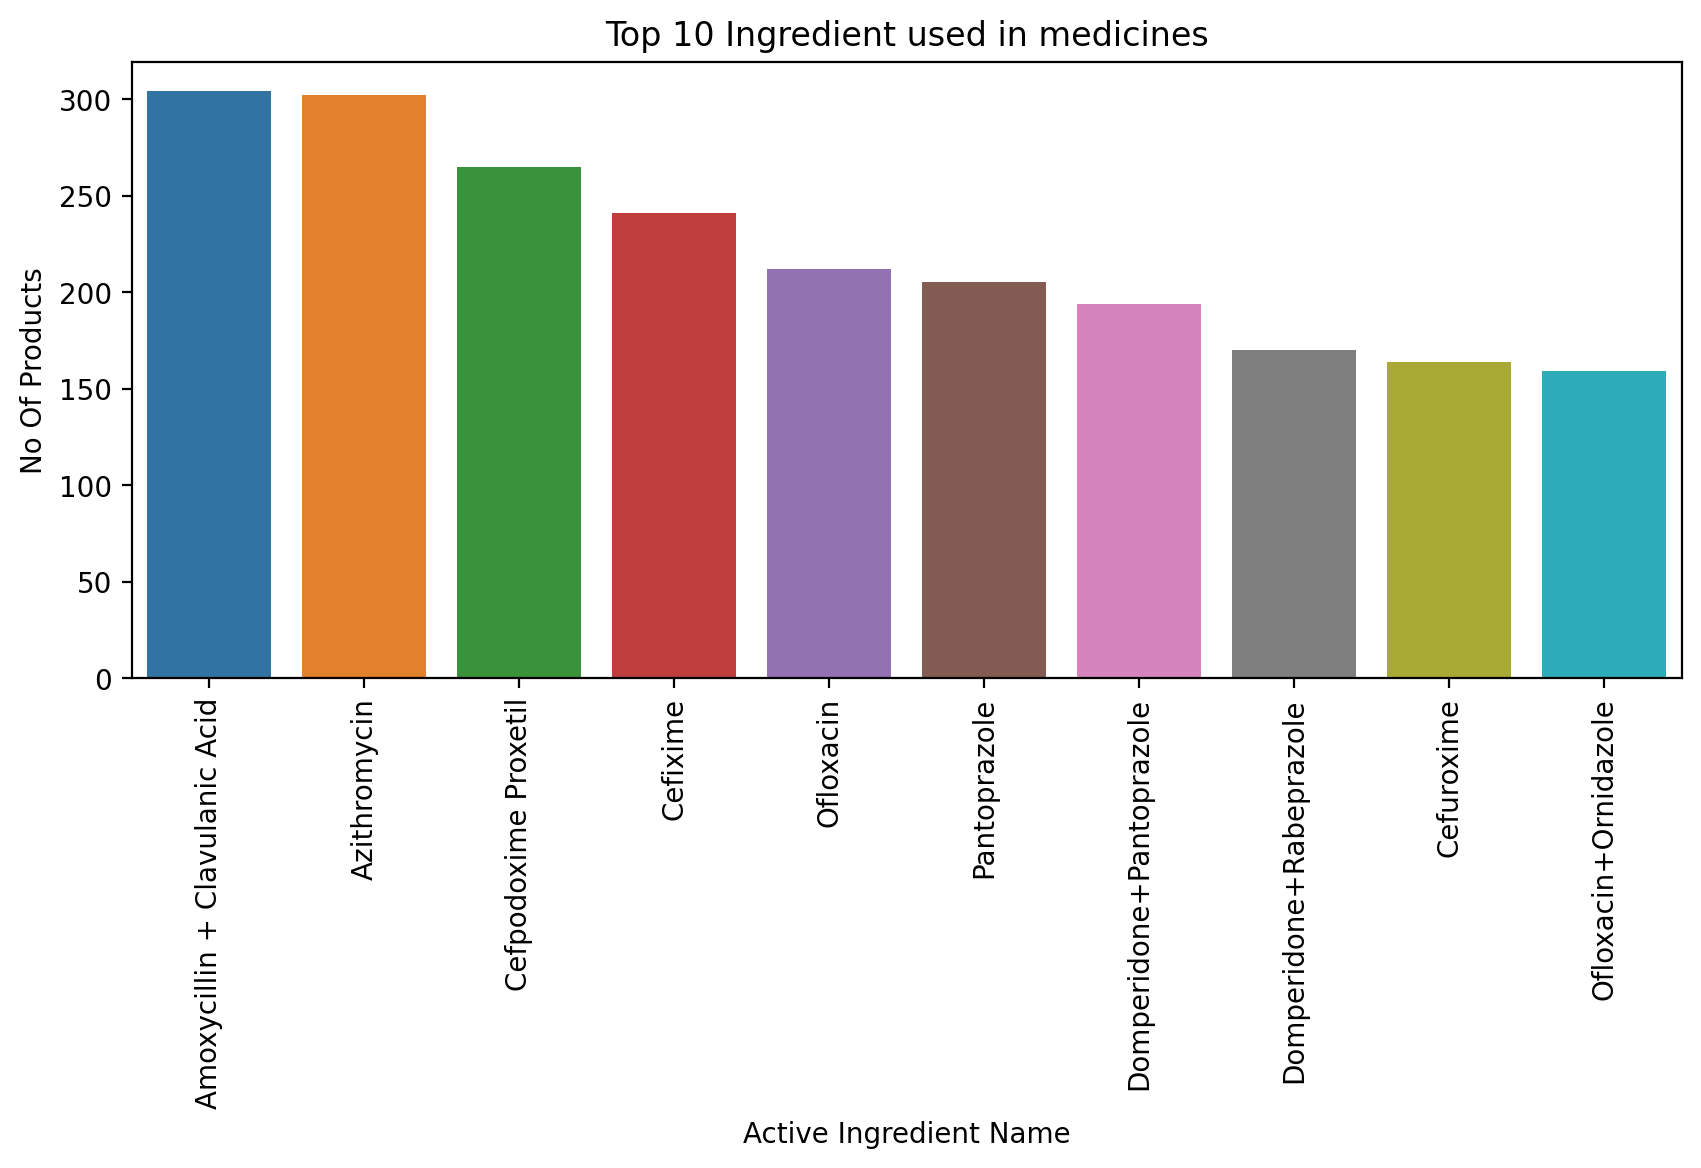

In [6]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=activeIngredient_count.index,y=activeIngredient_count.values)
plt.xticks(rotation=90)
plt.xlabel('Active Ingredient Name')
plt.ylabel('No Of Products')
plt.title('Top 10 Ingredient used in medicines');

In [7]:
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [8]:
df['desc'] = df['desc'].astype(str)
df['cleaned_desc'] = df['desc'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_html)

In [9]:
train = df['alcoholWarning'].iloc[0:2,] # type: ignore
print('train data -> ' + train)

0    train data -> It is unsafe to consume alcohol ...
1    train data -> It is unsafe to consume alcohol ...
Name: alcoholWarning, dtype: object


In [10]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer= 'word',stop_words= 'english')
count_vec = countvectorizer.fit_transform(train)
tfidf_vec = tfidfvectorizer.fit_transform(train)

count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

df_countvect = pd.DataFrame(data = count_vec.toarray(),index = ['Doc1','Doc2'],columns = count_tokens) # type: ignore
df_tfidfvect = pd.DataFrame(data = tfidf_vec.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)

print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      30mg  3mg  500mg  alcohol  consume  dep  glibocer  tablet  unsafe
Doc1     1    0      0        1        1    1         0       1       1
Doc2     0    1      1        1        1    0         1       1       1

TD-IDF Vectorizer

          30mg       3mg     500mg   alcohol   consume       dep  glibocer  \
Doc1  0.498446  0.000000  0.000000  0.354649  0.354649  0.498446  0.000000   
Doc2  0.000000  0.446101  0.446101  0.317404  0.317404  0.000000  0.446101   

        tablet    unsafe  
Doc1  0.354649  0.354649  
Doc2  0.317404  0.317404  


In [11]:
df = df.reset_index()
tfidfvectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=1, stop_words='english')
tfidfmatrix = tfidfvectorizer.fit_transform(df['cleaned_desc'])

In [12]:
cosine_sim = linear_kernel(tfidfmatrix, tfidfmatrix)
cosine_sim

array([[1.        , 0.03298968, 0.03298968, ..., 0.0403393 , 0.0168267 ,
        0.04196114],
       [0.03298968, 1.        , 0.89300298, ..., 0.0393312 , 0.01770259,
        0.05802768],
       [0.03298968, 0.89300298, 1.        , ..., 0.0393312 , 0.01770259,
        0.05802768],
       ...,
       [0.0403393 , 0.0393312 , 0.0393312 , ..., 1.        , 0.01942755,
        0.10244969],
       [0.0168267 , 0.01770259, 0.01770259, ..., 0.01942755, 1.        ,
        0.01746082],
       [0.04196114, 0.05802768, 0.05802768, ..., 0.10244969, 0.01746082,
        1.        ]])

In [13]:
cosine_similarity(tfidfmatrix, tfidfmatrix)

array([[1.        , 0.03298968, 0.03298968, ..., 0.0403393 , 0.0168267 ,
        0.04196114],
       [0.03298968, 1.        , 0.89300298, ..., 0.0393312 , 0.01770259,
        0.05802768],
       [0.03298968, 0.89300298, 1.        , ..., 0.0393312 , 0.01770259,
        0.05802768],
       ...,
       [0.0403393 , 0.0393312 , 0.0393312 , ..., 1.        , 0.01942755,
        0.10244969],
       [0.0168267 , 0.01770259, 0.01770259, ..., 0.01942755, 1.        ,
        0.01746082],
       [0.04196114, 0.05802768, 0.05802768, ..., 0.10244969, 0.01746082,
        1.        ]])

In [14]:
products = pd.Series(df.index, index=df['id'])
medicine_idx = df['id']

def recommend(medicinename,medicine_idx, similarity,products, topn):
    idx = medicine_idx[medicinename]

    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:5*topn]

    result_indices = [i[0] for i in sim_scores]
    idx_range = products.iloc[result_indices]
    recommendation = df[df['id'].isin(idx_range.values)]

    return recommendation[['name','PricePerTablet']].sort_values('PricePerTablet').head(topn)

In [15]:
medicinesample1 = 'Prasusafe 5mg Tablet'
res1 = recommend(
    medicinesample1,
    products,
    cosine_sim,
    medicine_idx,
    10)

res1[['name','PricePerTablet']]

,name,PricePerTablet
5212,Ecogrel 5mg Tablet,5.4
1858,Prasuvix 5mg Tablet,6.0
3291,Prasulet 5mg Tablet,6.2
720,Prasumax 5mg Tablet,7.5
1369,Prethromb 5mg Tablet,7.6
1043,Anticlot 75 Tablet,NaN
1048,Antiplatt Tablet,NaN
2935,Ceruvin 75 Tablet,NaN
3057,Cidogrel 75mg Tablet,NaN
3267,Clavix 150 Tablet,NaN


In [16]:
medicinesample1 = 'Advog M 0.3 Plus Tablet'
res2 = recommend(
    medicinesample1,
    products,
    cosine_sim,
    medicine_idx,
    11)

res2[['name','PricePerTablet']]

,name,PricePerTablet
8871,Medfor V 500mg/0.2mg Tablet,4.10
12077,Prandial M 0.2 Tablet,5.60
1118,Apribose M 0.2 Tablet SR,6.30
1119,Apribose M 0.3 Tablet SR,7.20
1,Glibocer M 500mg/0.3mg Tablet,7.90
373,Advog M 0.2 Tablet SR,8.80
10513,Obimet V 0.2 Tablet PR,8.80
3,Prandial M 0.3 Tablet,9.30
2,Vogliplay M 500mg/0.3mg Tablet,9.60
4,Vogloyd M 500mg/0.3mg Tablet,9.87


In [17]:
medicinesample1 = 'Glibocer M 500mg/0.3mg Tablet'
res3 = recommend(
    medicinesample1,
    products,
    cosine_sim,
    medicine_idx,
    11)

res3[['name','PricePerTablet']]

,name,PricePerTablet
8871,Medfor V 500mg/0.2mg Tablet,4.10
12077,Prandial M 0.2 Tablet,5.60
1118,Apribose M 0.2 Tablet SR,6.30
1119,Apribose M 0.3 Tablet SR,7.20
373,Advog M 0.2 Tablet SR,8.80
10513,Obimet V 0.2 Tablet PR,8.80
3,Prandial M 0.3 Tablet,9.30
2,Vogliplay M 500mg/0.3mg Tablet,9.60
4,Vogloyd M 500mg/0.3mg Tablet,9.87
5,Welvog MF 500mg/0.3mg Tablet,10.10


In [18]:
medicinesample4 = 'Abnerve Injection'
res4 = recommend(
    medicinesample4,
    products,
    cosine_sim,
    medicine_idx,
    11)

res4[['name','PricePerTablet']]

,name,PricePerTablet
1775,B Plus Injection,NaN
1940,Bestodek 25mg Injection,NaN
2842,Celecel Injection,NaN
3354,Clofenac 25mg Injection,NaN
3468,Cobamel Plus Injection,NaN
3473,Cobistar Injection,NaN
3571,Combikit 12 Injection,NaN
4066,Delofine Injection,NaN
4286,Dicloder 25mg Injection,NaN
4288,Diclodrop 75mg Injection,NaN


In [19]:
medicinesample5 = 'Altec Syrup'
res5 = recommend(
    medicinesample5,
    products,
    cosine_sim,
    medicine_idx,
    11)

res5[['name','PricePerTablet']]

,name,PricePerTablet
437,Airsurge Syrup,NaN
537,Alerfri P Syrup,NaN
1218,Aroget LS Syrup,NaN
1294,Asphyllin Expectorant,NaN
1977,Betawin M Syrup,NaN
2135,Blisdox CV Dry Syrup,NaN
2319,C.R.M.S Syrup,NaN
2327,Cacef CV Dry Syrup,NaN
2365,Cafola Syrup,NaN
2743,Cefpox CV Dry Syrup,NaN


In [23]:
df2 = pd.read_csv('netmeds_Segregated.csv')
del df2['Unnamed: 0']
df2.head()

,Medicine Name,Composition,MRP,Best Price,Affliction,Medicine,Strength
0,Atrest 12.5mg Tablet 10'S,TETRABENAZINE 12.5MG,154.04,123.23,ADHD,TETRABENAZINE,12.5MG
1,Atrest 25mg Tablet 10'S,TETRABENAZINE 25MG,261.49,209.19,ADHD,TETRABENAZINE,25MG
2,Capnea Injection 1ml,Caffeine Citrate 20 MG,277.38,249.64,ADHD,Caffeine Citrate,20 MG
3,Acnedap Gel 15gm,DAPSONE 5%W/W,362.03,289.62,Acne,DAPSONE,5%W/W
4,Acnedap Plus Gel 15gm,ADAPALENE 0.1%+DAPSONE 5%,350.90,280.72,Acne,ADAPALENE,0.1%


In [22]:
df1 = df
df1.head()

,index,id,name,desc,activeIngredient,alcoholWarning,breastfeedingWarning,pregnancyWarning,manufacturer,url,PricePerTablet,cleaned_desc
0,0,2 Dep 30mg Tablet,2 Dep 30mg Tablet,2 Dep 30mg Tablet works by increasing the leve...,Duloxetine,It is unsafe to consume alcohol with 2 Dep 30m...,2 Dep 30mg Tablet is probably unsafe to use du...,2 Dep 30mg Tablet may be unsafe to use during ...,Orchid Chemicals & Pharmaceuticals Ltd,/drugs/2 Dep-Tablet-287454,NaN,2 dep 30mg tablet works by increasing the leve...
1,1,Glibocer M 500mg/0.3mg Tablet,Glibocer M 500mg/0.3mg Tablet,Glibocer M 500mg/0.3mg Tablet belongs to a cat...,Metformin+Voglibose,It is unsafe to consume alcohol with Glibocer ...,Glibocer M 500mg/0.3mg Tablet is probably unsa...,Glibocer M 500mg/0.3mg Tablet may be unsafe to...,Retra Life Science Pvt Ltd,https://www.1mg.com/drugs/glibocer-m-500mg-0.3...,7.90,glibocer m 500mg 0 3mg tablet belongs to a cat...
2,2,Vogliplay M 500mg/0.3mg Tablet,Vogliplay M 500mg/0.3mg Tablet,Vogliplay M 500mg/0.3mg Tablet belongs to a ca...,Metformin+Voglibose,It is unsafe to consume alcohol with Vogliplay...,Vogliplay M 500mg/0.3mg Tablet is probably uns...,Vogliplay M 500mg/0.3mg Tablet may be unsafe t...,https://www.1mg.com/drugs/vogliplay-m-500mg-0....,NaN,9.60,vogliplay m 500mg 0 3mg tablet belongs to a ca...
3,3,Prandial M 0.3 Tablet,Prandial M 0.3 Tablet,Prandial M 0.3 Tablet belongs to a category of...,Metformin+Voglibose,It is unsafe to consume alcohol with Prandial ...,Prandial M 0.3 Tablet is probably unsafe to us...,Prandial M 0.3 Tablet may be unsafe to use dur...,https://www.1mg.com/drugs/prandial-m-0.3-table...,NaN,9.30,prandial m 0 3 tablet belongs to a category of...
4,4,Vogloyd M 500mg/0.3mg Tablet,Vogloyd M 500mg/0.3mg Tablet,Vogloyd M 500mg/0.3mg Tablet belongs to a cate...,Metformin+Voglibose,It is unsafe to consume alcohol with Vogloyd M...,Vogloyd M 500mg/0.3mg Tablet is probably unsaf...,Vogloyd M 500mg/0.3mg Tablet may be unsafe to ...,https://www.1mg.com/drugs/vogloyd-m-500mg-0.3m...,NaN,9.87,vogloyd m 500mg 0 3mg tablet belongs to a cate...


In [28]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

df_zeroshot = pd.DataFrame({
    'cleaned_desc': df1['cleaned_desc'],
    'Affliction': df2['Affliction'][:100]
})

df_zeroshot.head()

,cleaned_desc,Affliction
0,2 dep 30mg tablet works by increasing the leve...,ADHD
1,glibocer m 500mg 0 3mg tablet belongs to a cat...,ADHD
2,vogliplay m 500mg 0 3mg tablet belongs to a ca...,ADHD
3,prandial m 0 3 tablet belongs to a category of...,Acne
4,vogloyd m 500mg 0 3mg tablet belongs to a cate...,Acne


In [53]:
df_zeroshot['Affliction'].value_counts()

Infection              621
Hypertension           617
Diabetes               518
Epilepsy/Convulsion    488
High Cholesterol       487
                      ... 
Fungal Infections        1
Eye Infections           1
Diagnostic               1
Ayurvedic Medicine       1
Wrinkle/Anti Ageing      1
Name: Affliction, Length: 103, dtype: int64

In [123]:
labels = df_zeroshot['Affliction'].value_counts().iloc[:20].index.tolist()
#labels = df_zeroshot['Affliction'].iloc[:40].unique()
labels

['Infection',
 'Hypertension',
 'Diabetes',
 'Epilepsy/Convulsion',
 'High Cholesterol',
 'Pain relief',
 'Ulcer/Reflux/Flatulence',
 'Cough And Cold',
 'Allergies',
 'Hormonal Therapy',
 'Asthma/COPD',
 'Fungal',
 'Supplements',
 'Fever',
 'Depression',
 'Skin Infections',
 'Anaemia',
 'Vomitting/Emesis',
 'Schizophrenia',
 'Neuropathic Pain']

In [84]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli", tokenizer="roberta-large-mnli")

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [124]:
classifier(df_zeroshot['cleaned_desc'].iloc[:1], labels)

{'sequence': '2 dep 30mg tablet works by increasing the level of chemical messengers serotonin and noradrenaline in the brain that have a calming effect on the brain and relax the nerves thus treating your illness it may be taken with or without food it is advised to take this medicine at a fixed time each day to maintain a consistent level in the blood if you miss any doses take it as soon as you remember do not skip any doses and finish the full course of treatment even if you feel better this medication mustn t be stopped suddenly as it may worsen your symptoms some common side effects of this medicine include nausea headache and dry mouth it even causes dizziness and sleepiness so do not drive or do anything that requires mental focus until you know how this medicine affects you however these side effects are temporary and usually resolve on their own in some time please consult your doctor if these do not subside or bother you before taking 2 dep 30mg tablet inform your doctor if 

In [135]:
def classify_text(text, labels):
    result = classifier(text, labels)
    return result["labels"][0]  # type: ignore

df_zeroshot.loc[31:45, 'Predicted_Affliction'] = df_zeroshot['cleaned_desc'].iloc[31:45].apply(lambda x: classify_text(x, labels)) # type: ignore

In [139]:
df_result = df_zeroshot[['cleaned_desc','Predicted_Affliction']]
df_result.head(45)

,cleaned_desc,Predicted_Affliction
0,2 dep 30mg tablet works by increasing the leve...,Epilepsy/Convulsion
1,glibocer m 500mg 0 3mg tablet belongs to a cat...,Diabetes
2,vogliplay m 500mg 0 3mg tablet belongs to a ca...,Diabetes
3,prandial m 0 3 tablet belongs to a category of...,Diabetes
4,vogloyd m 500mg 0 3mg tablet belongs to a cate...,Diabetes
5,welvog mf 500mg 0 3mg tablet belongs to a cate...,Diabetes
6,2 dep 30mg tablet works by increasing the leve...,Epilepsy/Convulsion
7,2 h 25mg tablet should be taken with or withou...,Ulcer/Reflux/Flatulence
8,2 pen 250mg 250mg injection should only be adm...,Vomitting/Emesis
9,3 kat 60 tablet sr should be taken regularly a...,Ulcer/Reflux/Flatulence
